
 ## TRAVEAUX DIRIGES DE TRATRAITEMENT D'IMAGE: Nous allons aborde les notions comme 
 ## le contraste d'une image, la luminance, l'amelioration du contraste d'une image, covolution          d'image, detection de contours. Les deux dernieres notions sont traitees dans le notebook suivant.

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image #importation du sous-module Image du module PIL
img_gris = Image.open("lena_gris.png")
#img_gris1 = Image.open("lena_ajout_luminance.png")
img_obscure = Image.open("obscure.png")
lena = Image.open("lena.png")
bruit1 = Image.open("bruit1.png")
couleur = Image.open("Couleur.PNG")
#img_gris.show()
#img_obscure.show()
lena.show()

### Lecture des fichiers pgm pour obtention de la matrice d'une image a niveau de gris
### en suite creation des fichier pgm pour generation(Creation) d'une image a niveau de gris, ces fonctions sont uniquement pour les images au format pgm, donc apres cette session nous travaillons sur les images avec d'autres formats comme png.

In [31]:
#lecture du fichier pgm pour construction de la matrice de l'image
def readpgm(file):
    """ Cette fonction lit en fichier pgm pour obtenir sa matrice d'image"""
    
    with open(file,"r") as file:
        img = file.readlines()
    lent = img[2]
    lent1 = lent.split(" ")
    lent1 = [int(i) for i in lent1]
    #print(type(lent1[1]))
    imgelt = img[3:]
    img_text = "".join(imgelt)
    #img_text1  ="".join(img_text)
    img_split = img_text.split("\n")
    #print(img_split)
    if '' in img_split:
        img_split.remove('')

    #print(img_split)    
    final_matrix = img_split[1:] 
    #print(final_matrix)
    final_matrix = [int(i) for i in final_matrix]
    img_matrix = np.reshape(final_matrix, (lent1[0],lent1[1]))
    
    return img_matrix
    


In [32]:
test = readpgm("p.pgm")
#print(test)
pgm1 =  readpgm("pmg1.pgm")

In [33]:
def saveImage(matrix):
    file = input("Entrez le nom de votre fichier")
    dim  = matrix.shape
    matrix = np.reshape(matrix,dim[0]*dim[1])
    with open(file+".pgm","a") as f:
        f.writelines("P2\n")
        f.writelines("# Create by Laure\n")
        f.writelines("{} {}\n".format(dim[0],dim[1]))
        
        for i in matrix:
            f.writelines("{}\n".format(i))    
    
    

In [95]:
#saveImage(test)
saveImage(pgm1)

Entrez le nom de votre fichierpmg2


### dans cette session nous nous interessons aux images couleur, on peut extraire les differentes composates vert rouge blueue, et avons egalement la possibilite d'obtenir l'image a niveau de gris d'une image sans passer par le format pgm.

In [5]:
def composante_verte(im):
    """ Cette fonction retourne la composante verte d'une image"""
    tab=np.array(im)
    dim = tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
                tab[i][j][0]=0
                tab[i][j][2]=0
    return Image.fromarray(tab)

        
lena_v = composante_verte(couleur)
lena_v.show()
#lena_v.save("lena_verte.png")

#### L’œil est plus sensible à certaines couleurs qu’à d’autres. Le vert (pur), par exemple, paraît plus clair que le bleu (pur). Pour tenir compte de cette sensibilité dans la transformation d’une image couleur en une image en niveaux de gris, on ne prend généralement pas la moyenne arithmétique des intensités de couleurs fondamentales, mais une moyenne pondérée. La formule standard donnant le niveau de gris en fonction des trois composantes est : gris = 0.299 · rouge + 0.587 · vert + 0.114 · bleue.

In [11]:
def composante_bleue(im):
    """ Cette fonction retourne la composante bleue d'une image"""
    tab=np.array(im)
    dim = tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
                tab[i][j][0]=0
                tab[i][j][1]=0
    return Image.fromarray(tab)

             
#lena_b = composante_bleue(couleur)
#lena_b.show()
lena_b.save("couleur_gris.png")

In [12]:
#import imageio

def niveau_gris(im):
    """ Cette fonction prend une image et renvoie une image en niveau de gris"""
    tab=np.array(im)
    dim = tab.shape
    tab1=np.zeros((dim[0],dim[1]),dtype="uint8") # matrice de 0 entier
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            gris = 0.299*tab[i][j][0] + 0.587*tab[i][j][1] + 0.114*tab[i][j][2]
            tab1[i][j] = int(gris)
                     
    return Image.fromarray(tab1)

lena_g = niveau_gris(couleur)
lena_g.show()
#lena_g.save("lena_gris.png")
#imageio.imwrite("lena_gris.png",lena_g)


In [44]:
lena_g.show()


    ## L’histogramme d’une photo permet de compter le nombre de pixel d’un niveau de gris donné.
    ### Maintenons que nous avons obtenu les images en niveau de  gris(matrice) , passons aux differents traitement


In [102]:

img_obscure_gris = niveau_gris(img_obscure)
#img_obscure_gris.show()
#img_obscure_gris.save("img_obscure_gris.png")


In [20]:
# Histogramme d'une image
def histo(im):
    """ cette foonction prend une image et retourne une liste de  taille 256en première position (indice 0), le nombre de pixels noirs (gris 0), en deuxième position (indice
    1), le nombre de pixels gris 1, . . . , en dernière position (255), le nombre de pixels blancs (gris 255)."""
    ""
    tab = np.array(im)
    dim = tab.shape
    taille=dim[0]*dim[1]
    nb_niveau_gris = []
    liste = np.reshape(tab, taille)
    liste_finale=list(liste)
    for k in range(256):
        nb_niveau_gris.append(liste_finale.count(k))
        
    return nb_niveau_gris
    

img_gris =Image.open("lena_gris.png")
liste = histo(img_gris)
#print(len(liste))
#print(liste)

In [22]:
def histo_2(im):
    """ cette fonction retourne l'histograme en baton"""
    tab = np.array(im)
    dim = tab.shape
    taille=dim[0]*dim[1]
    nb_niveau_gris = []
    liste = np.reshape(tab, taille)
    liste_finale=list(liste)
    

    return liste_finale

#img_gris =Image.open("lena_gris.png")
liste_2 = histo_2(img_gris)
#liste_2_rouge = histo_2(lena_r)
#liste_2_vert = histo_2(lena_v)
#liste_2_bleue = histo_2(lena_b)

#print(len(liste))
#print(liste)


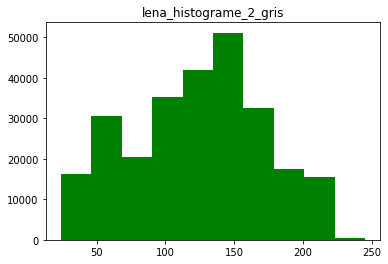

In [23]:
#Affiche de l'histogramme avec densite de bag
def histogramme_2(liste_2,title,name,couleur):
    """ cette fonction  prend une liste  et renvoie l'histogramme"""
    
    plt.hist(liste_2,color=couleur)
    #plt.title("lena_histograme")
    plt.title(title)
    #plt.savefig(name)
    
    plt.show()
    

histogramme_2(liste_2,"lena_histograme_2_gris","lena_histograme_2.png","green")

#print(his)

    
    

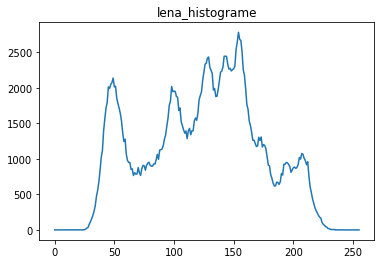

In [21]:
#print(len(liste))
#print(liste)

def histogramme(liste,title,name):
    """ cette fonction plot l'histogramme"""
    x=list(range(256))
    plt.plot(x,liste)
    #plt.title("lena_histograme")
    plt.title(title)
    plt.savefig(name)
    return plt.show()

histogramme(liste,"lena_histograme","lena_histograme.png")
#plt.savefig("his_original_2.png")

#print(his)
    
    


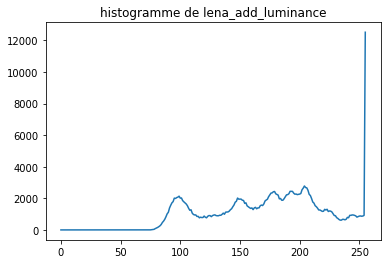

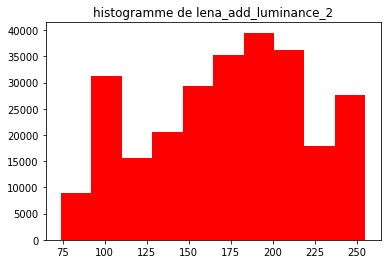

In [24]:
# Modifier la  luminosité

def add_luminance(im, d):
    """cette fonction prend en argument une image en niveau de gris décrite par une matrice dont chaque pixel est représenté 
    seulement par le niveau de gris et un entier entre 0 et 255, valeur du décalage du niveau de gris et renvoie une nouvelle image
    """
    tab=np.array(im)
    dim=tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            test=tab[i][j]+d 
            if test > 255 :
                tab[i][j] = 255
            else:
                tab[i][j] = test
    #print(tab.shape)
    return Image.fromarray(tab)


lena_ajout= add_luminance(img_gris, 50)

#lena_ajout.show()
#lena_ajout.save("lena_ajout_luminance.png")
#lena_ajout.save("lena_ajout_luminance.pgm")

""" affichage de l'histogramme"""

his_ajout = histo(lena_ajout)
histogramme(his_ajout, "histogramme de lena_add_luminance","histogramme de lena_add_luminance.png")

his_ajout_2 = histo_2(lena_ajout)
histogramme_2(his_ajout_2, "histogramme de lena_add_luminance_2","histogramme de lena_add_luminance_2.png","red")

    

In [143]:
#lena_ajout.show()
lena_ajout.save("ajout_luminance50.png")

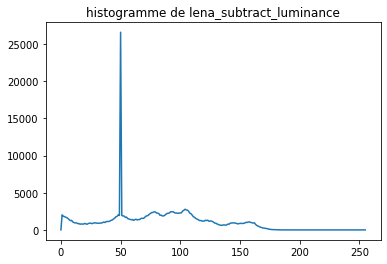

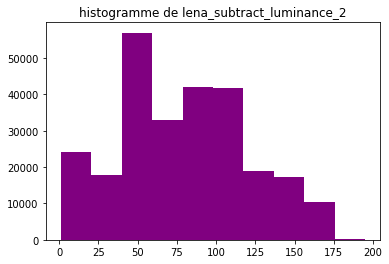

In [25]:
def subtract_luminance(im, d):
    
    tab=np.array(im)
    dim=tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if tab[i][j]>d:
                tab[i][j]=tab[i][j]-d
            else:
                tab[i][j]=d
            
    return Image.fromarray(tab)

lena_subtract = subtract_luminance(img_gris, 50)
#lena_subtract .show()
lena_subtract .save("lena_substract_luminance.png")
#lena_subtract .save("lena_ajout_luminance.pgm")

""" affichage de l'histogramme"""

his_subtract=histo(lena_subtract,)
histogramme(his_subtract, "histogramme de lena_subtract_luminance","histogramme de lena_subtract_luminance.png") 


his_subtract_2=histo_2(lena_subtract,)
histogramme_2(his_subtract_2, "histogramme de lena_subtract_luminance_2","histogramme de lena_subtract_luminance_2.png","purple") 
  

In [145]:
lena_subtract.save("substract_luminance50.png")

#### il est très mauvais d’augmenter ainsi la luminosité : avec un décalage de 50, il n’existera plus aucun point entre 0 et 50, et les points ayant une valeur supérieure à 205 deviendront des points parfaitement blancs, puisquela valeur maximale possible est 255. La nouvelle image contient des zones brûlées. Au lieu donc d'utiliser la methode precedente, qui consiste dit que :pour une valeur de pixel p, si p + d > 255 il faut stocker 255, et si p + d < 255, il faut stocker p+d, il vaut mieux utiliser une fonction « presque bijective » de forte croissance au voisinage de 0 et de très faible croissance au voisinage de 255.
#### Nous allonsci-dessous definie la fonction change_luminosite(im,d), qui modifie la luminance d'une image, en  se comportant comme une fonction bijective.

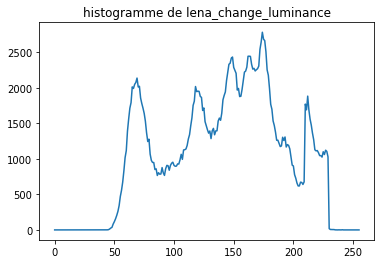

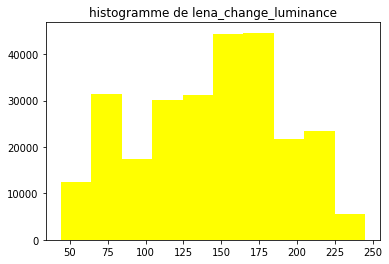

In [42]:
def change_luminosite(im,minux,maxi):
    tab = np.array(im)
    dim=tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if 50>tab[i][j]<10:
                tab[i][j]= tab[i][j]+maxi
                
            elif 250>tab[i][j]<210:
                tab[i][j]=tab[i][j]+minux
    return Image.fromarray(tab)

lena_change = change_luminosite(img_gris,20,30)
#lena_change.show()
lena_change.save("lena_change_luminance.png")
#lena_subtract .save("lena_ajout_luminance.pgm")

""" affichage de l'histogramme"""

his_change=histo(lena_change)
histogramme(his_change,"histogramme de lena_change_luminance","histogramme de lena_change_luminance.png") 


his_change_2=histo_2(lena_change)
histogramme_2(his_change_2,"histogramme de lena_change_luminance","histogramme de lena_change_luminance.png","yellow") 

    

In [147]:
lena_change.save("change_luminance.png")

### Contraste(luminosite) d'une image est la variation d'intensite lumineuse d'une couleur entre 0% noir,aux couleurs 100% blanc. Le contraste peut être défini de plusieurs façons :
#### 1* Ecart-type des variations des niveaux de gris: autrement dit c'est la moyenne des sommes des carrees de difference entre les pixels et la luminance 

#### 2* Variation entre niveaux de gris min et max: autrement dit, c'est le rapport entre le difference du plus grand pixel au plus petit et la somme de ces deux


In [46]:
def luminance(im):
    tab = np.array(im)
    dim1, dim2 = tab.shape
    moy= sum(sum(tab))
    moy =  moy/(dim1*dim2)
    return moy
            

In [47]:
#Contraste d'une image
def contraste_1(im,moy):
    """cette fonction prend en entree une image et la luminace pour retourner le contraste en utilisant la formule 1"""
    tab=np.array(im)
    dim=tab.shape
    ecart_type= 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            ecart = (tab[i][j]-moy)**2
            ecart_type += ecart
    #print(ecart_type)
    contraste = np.sqrt(ecart_type/(dim[0]*dim[1]))        
    return contraste

moy = luminance(img_gris )
result_1 = contraste_1(img_gris ,moy)   
print(result_1)
    

132.2571627140426


In [49]:
def contraste_2(im):
    """ cette fonction calcule le contraste en utilisant les variation de pils max et min"""
    tab=np.array(im)
    contraste = (np.max(tab) - np.min(tab))/(np.max(tab) + np.min(tab))
            
    return contraste

#moy = luminance(img_gris )
result_2 = contraste_2(img_gris)   
print(result_2)
    

17.0


/home/laure/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


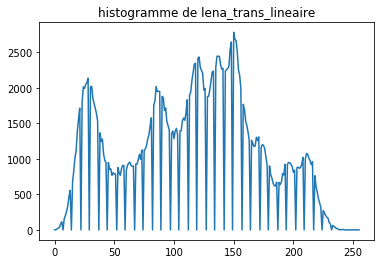

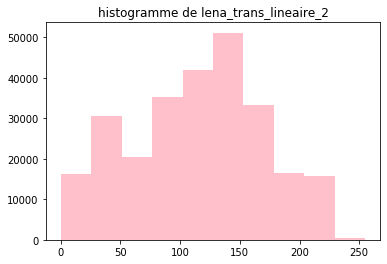

In [50]:
#Amelioration d contraste d'une image
#Methode par transformation lineaire
#LUT: Look Up Table

def trans_lineaire(im):
    """Cette fonction prendre en entree une image et retourne en sortie une autre 
    image dont le constraste a ete  ameliorer  par tranformation lineaire  """
    tab=np.array(im)
    dim=tab.shape
    minux=np.min(tab)
    maxi = np.max(tab)
    L=[] #ce tableau contient les valeurs des pixels a niveau de gris auxquels on a appliquer la transformation lineaire.
    for i in range(256):
        L.append((i-minux)*255/(maxi-minux))
    for i in range(dim[0]):
        for j in range(dim[1]):
            tab[i][j] = L[tab[i][j]]
            
    return Image.fromarray(tab)
        
    
img_gris =Image.open("lena_gris.png")

img_lineaire = trans_lineaire(img_gris)
#img_gris.show()
#img_lineaire.show()
#img_lineaire.save("img_trans_lineaire.png")
his_lineaire=histo(img_lineaire)
histogramme(his_lineaire, "histogramme de lena_trans_lineaire","histogramme de lena_trans_lineaire.png") 

his_lineaire_2=histo_2(img_lineaire)
histogramme_2(his_lineaire_2, "histogramme de lena_trans_lineaire_2","histogramme de lena_trans_lineaire_2.png","pink") 


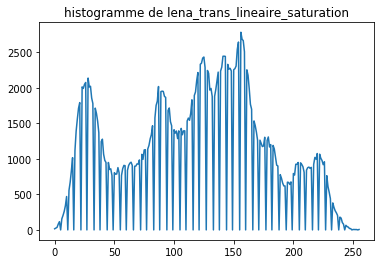

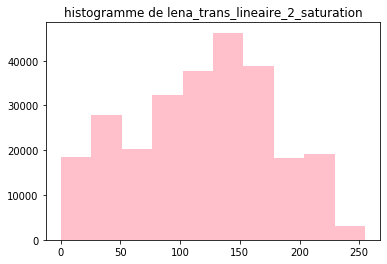

In [51]:
def trans_lineaire_saturation(im, d1,d2):
    """Cette fonction prend en entree une image et retourne en sortie une autre 
    image dont le constraste a ete  ameliorer  par tranformation lineaire  par saturation
    ici on choisit smin>min et Smax<= max: d1 est l'entier a ajouter au min pour obtenie Smin et d2..
    """
    tab = np.array(im)
    dim = tab.shape
    minux = np.min(tab)
    maxi = np.max(tab)
    Smin = minux + d1
    Smax = maxi - d2
    L=[] #ce tableau contient les valeur ddes pixels a niveau de gris auxquels on a appliquer la transformation lineaire par saturation.
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            value = 255*(tab[i][j] - Smin)/(Smax - Smin)
            if value <= 0:
                tab[i][j] = 0
            elif value >= 255:
                tab[i][j] = 255
            else:
                tab[i][j] = value
            
    return Image.fromarray(tab)
        
    
#img_gris =Image.open("lena_gris.png")

img_lineaire_satur = trans_lineaire_saturation(img_gris,2,10)
#img_gris.show()
#img_lineaire_satur.show()
#img_lineaire_satur.save("img_trans_lineaire.png")
his_lineaire_satur=histo(img_lineaire_satur)
histogramme(his_lineaire_satur, "histogramme de lena_trans_lineaire_saturation","histogramme de lena_trans_lineaire_saturation.png") 

his_lineaire_2=histo_2(img_lineaire_satur)
histogramme_2(his_lineaire_2, "histogramme de lena_trans_lineaire_2_saturation","histogramme de lena_trans_lineaire_2.png","pink") 
    

In [151]:
img_lineaire_satur.save("img_lineaire_satur_2_10.png")

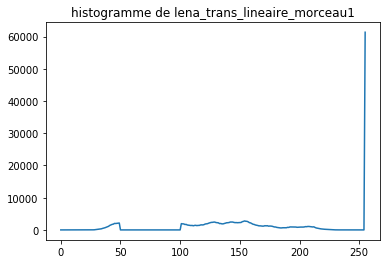

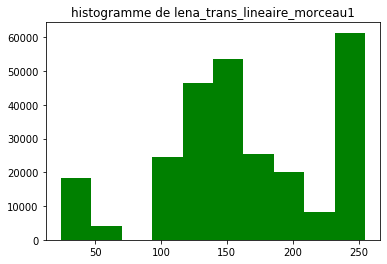

In [52]:
# tranformation lineaire par morceau: deux approches sont possibles

def trans_lineaire_morceau1(im, s1,s2):
    
    """Cette fonction prend en entree une image a niveau de gris et retourne une image Principe: Mise en œuvre de 2 seuils s1,s2 :
    - les valeurs entre [0, ...,s1[ et ]s2,...,255] sont inchangées
    - les pixels entre [s1...s2] sont mis à 255 (ces pixels sont blancs) """

    tab = np.array(im)
    dim = tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if  s2 >= tab[i][j]>= s1:
                tab[i][j] = 255  
    
    return Image.fromarray(tab)

img_lineaire_morceau1 = trans_lineaire_morceau1(img_gris,50,100)
#img_gris.show()
#img_lineaire_morceau1.show()
#img_lineaire_satur.save("img_trans_lineaire.png")
his_lineaire_morceau1=histo(img_lineaire_morceau1)
histogramme(his_lineaire_morceau1, "histogramme de lena_trans_lineaire_morceau1","histogramme de lena_trans_lineaire_morceau1.png") 

his_lineaire_2=histo_2(img_lineaire_morceau1)
histogramme_2(his_lineaire_2, "histogramme de lena_trans_lineaire_morceau1","histogramme de lena_trans_lineaire_morceau1.png","green") 
    
                           

In [153]:
img_lineaire_morceau1.save("img_lineaire_morceau1_50_100_255.png")

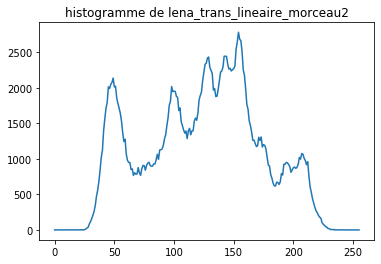

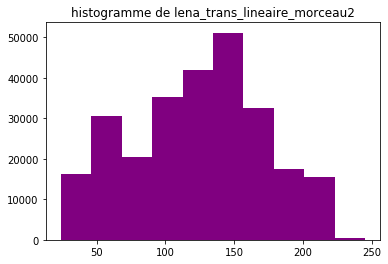

In [53]:
def trans_lineaire_morceau2(im,s1,s2):
    
    """Cette fonction prend en entree une image a niveau de gris et retourne une image
     la transformation « opposée » où seuls les pixels dont les valeurs sont
    appartiennent à l’intervalle [s1, s2] restent inchangés, les autres valeurs de pixels sont
    mises à 0 (« noirs »).
    Ces deux cas sont des exemples de transformations """
    
    tab = np.array(im)
    dim = tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if  s2 < tab[i][j]< s1:
                tab[i][j] = 0  
    
    return Image.fromarray(tab)

img_lineaire_morceau2 = trans_lineaire_morceau2(img_gris,50,150)
#img_gris.show()
#img_lineaire_satur.show()
#img_lineaire_satur.save("img_trans_lineaire.png")
his_lineaire_morceau2=histo(img_lineaire_morceau2)
histogramme(his_lineaire_morceau2, "histogramme de lena_trans_lineaire_morceau2","histogramme de lena_trans_lineaire_morceau2.png") 

his_lineaire_2=histo_2(img_lineaire_morceau2)
histogramme_2(his_lineaire_2, "histogramme de lena_trans_lineaire_morceau2","histogramme de lena_trans_lineaire_morceau2.png","purple") 
    
                           

In [ ]:
img_lineaire_morceau2.save("img_lineaire_morceau2_50_150_inchange.png")

In [ ]:
#Transformation non lineaire
def trans_no_lineaire(im):
    """Cette fonction prend en entree une image a niveau de gris et retourne une image"""
    tab = np.array(im)
    dim = tab.shape
    
    return Image.fromarray(tab)


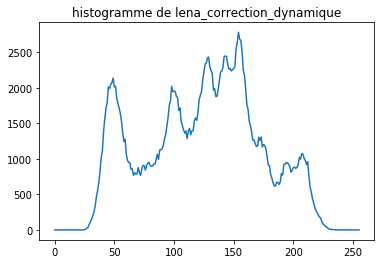

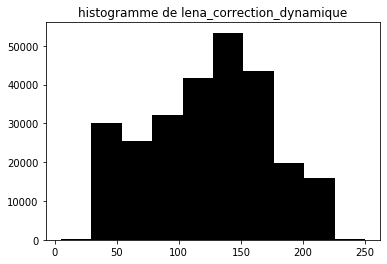

In [114]:
# Correction de la dynamique d'une image

def correction_dynamique(im):
    """Cette fonction prend en entree une image a niveau de gris et retourne une image"""
    tab = np.array(im)
    dm = tab.shape
    minux = np.min(tab)
    maxi = np.max(tab)
    
    for i in range(dm[0]):
        for j in range(dm[1]):
            if 0 <= tab[i][j] <= minux:
                if 0<= minux <= 15:
                    tab[i][j]=0
                else:
                    tab[i][j]=5
            elif tab[i][j]== maxi:
                if 245 < maxi <=255:
                    tab[i][j]= 255
                else:
                    tab[i][j]=250
                    
    
    return Image.fromarray(tab)
img_dynamique = correction_dynamique(img_gris)

his_dynamique=histo(img_dynamique)
histogramme(his_dynamique, "histogramme de lena_correction_dynamique","histogramme de lena_correction_dynamique.png") 

his_lineaire_2=histo_2(img_dynamique)
histogramme_2(his_lineaire_2, "histogramme de lena_correction_dynamique","histogramme de lena_correction_dynamique.png","black") 
    

In [21]:
# egalisation de l'histogramme

def egalisation_his(im):
    """ Cette fonction prend en parametre une image et retourne en sortir 
    l'histogramme l'egalise de cette image"""
    # Normalisation de l'histogramme
    his= histo(im)
    tab = np.array(im)
    dm = tab.shape
    taille = dm[0]*dm[1]
    his_n = [] 
    c = [] 
    t = []
    for i in range(len(his)):
        his_n.append(his[i]/taille)
        
    # Densité de probabilité normalisé
    for i in range(len(his)):
        densite  = 0
        for j in range(i):
            densite =densite + his_n[j]
        c.append(densite)
        
    #Transformation des niveaux de gris de l'image
    for i in range(dm[0]):
        for j in range(dm[1]):
            
            t.append(c[tab[i][j]]*255)
    return t

    

In [54]:
his_e = egalisation_his(img_gris)

tab = np.array(img_gris)
dim = tab.shape
image = np.reshape(his_e,(dim[0],dim[1]))

images = Image.fromarray(image)
images.show()
#images.save("lena_egalisation.png")

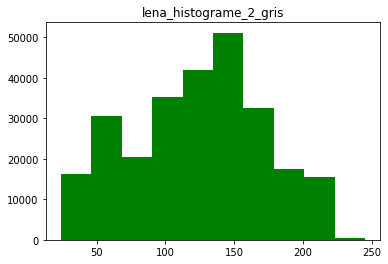

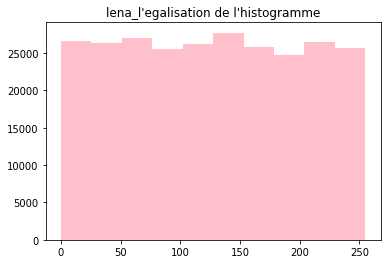

In [55]:

his_e = egalisation_his(img_gris)

#histogramme(his_e,"lena_l'egalisation de l'histogramme","lena_l'egalisation de l'histogramme.png")
histogramme_2(liste_2,"lena_histograme_2_gris","lena_histograme_2.png","green")
histogramme_2(his_e, "lena_l'egalisation de l'histogramme","lena_l'egalisation de l'histogramme en baton.png","pink")


In [130]:
"""Les operateurs larithmetique fonctionnent aussi sur les imgage"""

def addition(im1,im2):
    """ Il faut que les deux image soit de meme taille
    L’addition d’images peut permettre De diminuer le bruit d’une vue dans une série
d’images,  D’augmenter la luminance en additionnant une
image avec elle-même """
    
    tab1 = np.array(im1)
    tab2 = np.array(im2)
    dim = tab1.shape
    im = np.zeros((dim[0],dim[1]),dtype="uint8")
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            im[i][j] = min((tab1[i][j] + tab2[i][j]), 255)
    
    return Image.fromarray(im)



In [131]:
lena_addition = addition(img_gris,img_gris)
#plt.imshow(lena_addition)
#lena_addition.show()
lena_addition.save("addition.png")

/home/laure/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


In [125]:
def soustraction(im1,im2):
    """ a soustraction d’images peut permettre Détection de défauts, 
Détection de mouvements"""
    
    tab1 = np.array(im1)
    tab2 = np.array(im2)
    dim = tab1.shape
    im = np.zeros((dim[0],dim[1]),dtype="uint8")
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            im[i][j] = max((tab1[i][j] - tab2[i][j]), 0)
    
    return Image.fromarray(im)



In [127]:
soustraction1 = soustraction(img_gris,img_gris)
#plt.imshow(soustraction1)
#soustraction1.show()
#soustraction1.save("soustraction1.png")


In [ ]:
def multiplication(im,ratio):
    """ La multiplication d’images peut permettre d’améliorer le contraste ou la
luminosité"""
    
    tab = np.array(im)
    dim = tab.shape
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            tab[i][j] = min((tab[i][j]*ratio), 255)
    
    return Image.fromarray(tab)

multi =  multiplication(img_gris, 3)
multi.save("multiplication.png")
multi.show()
plt.imshow(multi)

In [116]:
def image_binaire(im):
    """ Cette fonction prend en entree une image  a niveau de gris, et retourne la matrice et  l'image binaire equivalent"""
    
    tab = np.array(im)
    dim = tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
            if tab[i][j] > 0 :
                tab[i][j] = 1
                
    return tab, Image.fromarray(tab)
    
im1_binaire,result1 = image_binaire(img_gris) 
im2_binaire, result2 = image_binaire(img_gris1) 
#result1.show()
#result2.show()

In [133]:

def not_logique(im):
    """ cette fonction prend en entree image retourne l'image correspondant au NOT logique"""
    tab = np.array(im)
    dim =  tab.shape
    for i in range(dim[0]):
        for j in range(dim[1]):
                tab[i][j] = ~tab[i][j]
    
    return Image.fromarray(tab)

not_logique = not_logique(img_gris) 
#not_logique.show()
not_logique.save("not_logique.png")


In [134]:
def and_logique(im1,im2):
    """ cette fonction prend en entree deux images binaire et retourne l'image correspondant au AND logique"""
    tab1 = np.array(im1)
    dim =  tab1.shape
    tab2 = np.array(im2)
    im = np.zeros((dim[0],dim[1]),dtype="uint8")
    for i in range(dim[0]):
        for j in range(dim[1]): 
            im[i][j] = tab1[i][j]&tab2[i][j]
    return Image.fromarray(im)
 
and_logique = and_logique(img_gris,img_gris)
#and_logique.show()
and_logique.save("and_logique.png")

In [135]:
def ou_logique(im1,im2):
    """ cette fonction prend en entree deux images binaire et retourne l'image correspondant au OU logique"""
    tab1 = np.array(im1)
    dim =  tab1.shape
    tab2 = np.array(im2)
    im = np.zeros((dim[0],dim[1]),dtype="uint8")
    for i in range(dim[0]):
        for j in range(dim[1]):
            im[i][j]  = tab1[i][j]|tab2[i][j]
            
    return Image.fromarray(im)

ou_logique = ou_logique(img_gris,img_gris)
#ou_logique.show()
ou_logique.save("ou_logique.png")


In [136]:
def xor_logique(im1,im2):
    """ cette fonction prend en entree deux images binaire et retourne l'image correspondant au XOR logique"""
    tab1 = np.array(im1)
    dim =  tab1.shape
    tab2 = np.array(im2)
  
    im = np.zeros((dim[0],dim[1]),dtype="uint8")
    for i in range(dim[0]):
        for j in range(dim[1]):
            im[i][j] = tab1[i][j]^tab2[i][j]
    return Image.fromarray(im)
 
xor_logique = xor_logique(img_gris,img_gris)
#xor_logique.show()
xor_logique.save("xor_logique.png")